In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
# mengambil dataset
data = pd.read_csv('/content/banana_quality.csv')

# mendapatkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [3]:
# Menampilkan dimensi dataset
data.shape

(8000, 8)

In [4]:
# Menampilkan dataset

data.head(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
5,-2.807722,1.138136,3.447627,-1.713302,-2.220912,2.079410,2.281203,Good
6,-0.230208,2.783471,1.681184,-0.529779,-1.958468,1.348143,2.181766,Good
7,-1.348515,3.232281,4.011817,-0.890606,-0.031994,2.395917,1.042878,Good
8,-2.012226,1.928034,0.698746,-0.959772,-1.349721,1.311802,1.048762,Good
9,0.053035,1.309993,-0.264139,-2.969297,0.303983,3.889359,1.931332,Good


In [5]:
#  membersihkan dataset

# Menghapus baris terakhir (jika kosong)
data = data.iloc[:-1, :]

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Menghapus nilai null (jika ada)
data.dropna(inplace=True)

<ipython-input-5-b360df473195>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)
<ipython-input-5-b360df473195>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [12]:
# Mengganti label 'good' dengan 1 dan 'bad' dengan 0 dalam kolom 'Category'
data['Quality'].replace({'Good': 1, 'Bad': 0}, inplace=True)



In [13]:
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [14]:
# Membuat variable untuk atribut dan label
X = data['Weight'] #atribut
Y = data['Quality'] #Label

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Membagi X dan y menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Membuat objek CountVectorizer untuk vektorisasi
vectorizer = CountVectorizer()

X_train = X_train.astype(str)
X_test = X_test.astype(str)
# Melakukan vektorisasi pada data latih dan data uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Melatih model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorized, Y_train)


DecisionTreeClassifier()

In [17]:
# Melakukan prediksi pada data uji yang telah di-vektorisasi
Y_pred = tree_model.predict(X_test_vectorized)

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy:', round(acc, 3))

Accuracy: 0.5


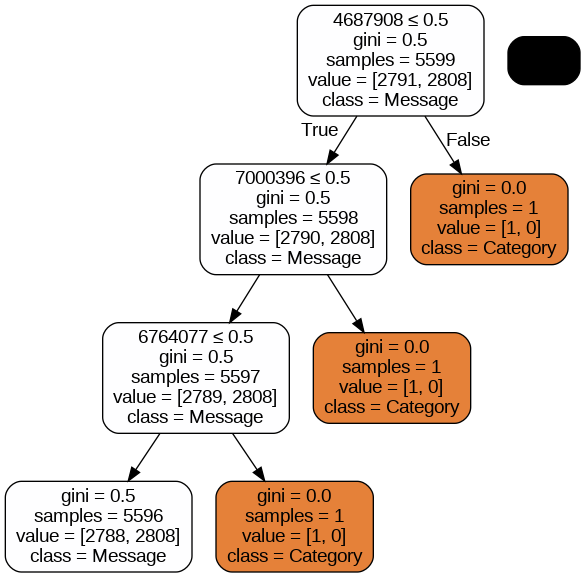

In [23]:
# Membuat objek DecisionTreeClassifier dengan max_depth=3
tree_model = DecisionTreeClassifier(max_depth=3)

# Melatih model dengan data latih
tree_model.fit(X_train_vectorized, Y_train)

# Membuat dot data dari model DecisionTreeClassifier
dot_data = StringIO()

export_graphviz(tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=vectorizer.get_feature_names_out(),
                class_names=['Category', 'Message'])  # Ganti dengan nama kelas Anda

# Membuat graph dari dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Memvisualisasikan graph
Image(graph.create_png())
